In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras import regularizers
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
np.random.seed(2018)

/Users/grace/workspace/keras/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/grace/workspace/keras/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
nb_epoch = 50 # 전체 데이터셋을 학습한 횟수
batch_size = 128 # optimizer가 가중치 업데이트를 하는 데이터의 수
verbose = 1
nb_classes = 10 #(0-9 numbers)
optimizer = Adam()#SGD()
n_hidden = 128
validation_split = 0.2

## load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

## Preprocess

In [6]:
reshape = 28*28
X_train = X_train.reshape(60000, reshape)
X_train = X_train.astype('float32')
X_test = X_test.reshape(10000, reshape)
X_test = X_test.astype('float32')

In [7]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

## Regularization

In [8]:
# regularize to 0-1
X_train /= 255
X_test /= 255

## Model

- without hidden layer 92%
- with hidden layer 94%
- with dropout 97%


optimizer
- SGD
- RMSprop
- Adam : 여기서는 아담이 제일 빠르고 제일 성능이 좋음

## Dropout

#### keras.layers.core.Dropout(rate, noise_shape=, seed=)
- rate : 드롭아웃을 적용할 입력 유닛의 비율
- noise_shape : 드롭아웃 마스크 형태

## Regularization: 과적합을 방지하는 방법

- kernel_regularizer : 가중치 행렬에 적용되는 일반화 함수
    - L1 (lasso): 모델의 복잡도를 가중치의 절댓값의 합으로
    - L2 (ridge): 가중치의 제곱 합으로
    - Elastic net: hybrid
- bias_regularizer : 바이어스 벡터에 적용되는 일반화 함수
- activity_regularizer : 계층의 출력에 적용되는 일반화 함수
- dropout

In [9]:
# hidden layer shape
n_hidden = 128
# dropout
dropout = 0.3

model = Sequential()
model.add(Dense(n_hidden, input_shape=(reshape,)))
#hidden layer
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(n_hidden))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(nb_classes, kernel_regularizer=regularizers.l2(0.01)))
#
model.add(Activation('softmax'))
# softmax : k dimension -> (0,1)

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
den

In [10]:
# 목적함수 - mse : 예측값과 실제 값 사이의 평균 제곱 오차
model.compile(loss='categorical_crossentropy',\
             optimizer=optimizer,\
             metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Earlystopping

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

early_stopping_callback = EarlyStopping(monitor='val_loss', \
                                       patience=100)

In [18]:
history = model.fit(X_train, y_train,\
                   batch_size=batch_size, epochs=nb_epoch,\
                   verbose=verbose, validation_split=validation_split,\
                   callbacks=[early_stopping_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s - loss: 0.0625 - acc: 0.9850 - val_loss: 0.0885 - val_acc: 0.9789
Epoch 2/30
48000/48000 [==============================] - 1s - loss: 0.0605 - acc: 0.9851 - val_loss: 0.0906 - val_acc: 0.9777
Epoch 3/30
48000/48000 [==============================] - 1s - loss: 0.0616 - acc: 0.9848 - val_loss: 0.0894 - val_acc: 0.9792
Epoch 4/30
48000/48000 [==============================] - 1s - loss: 0.0564 - acc: 0.9860 - val_loss: 0.0924 - val_acc: 0.9773
Epoch 5/30
48000/48000 [==============================] - 1s - loss: 0.0564 - acc: 0.9859 - val_loss: 0.0916 - val_acc: 0.9780
Epoch 6/30
48000/48000 [==============================] - 1s - loss: 0.0567 - acc: 0.9864 - val_loss: 0.0878 - val_acc: 0.9786
Epoch 7/30
48000/48000 [==============================] - 1s - loss: 0.0564 - acc: 0.9871 - val_loss: 0.0935 - val_acc: 0.9787
Epoch 8/30
48000/48000 [==============================] - 1s 

## evalute

train accuracy must be higher than test accuracy, otherwise training wasn't enough


- model.predict()
- model.evalute()
- model.predict_classes()
- model.predict_proba()

In [12]:
score = model.evaluate(X_test, y_test, verbose=verbose)
print('\n')
print('test score : ', score[0])
print('test accuracy : ', score[1])

 8736/10000 [=========================>....] - ETA: 0s

test score :  0.08087899531573058
test accuracy :  0.9799


In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

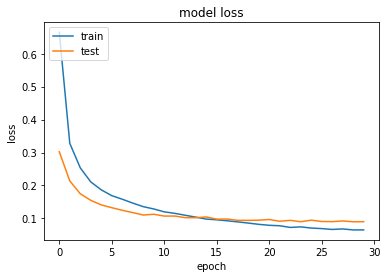

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Test해보기
- optimizer 테스트 (SGD, RMSprop, Adam) & 학습률
- epoch 수 증가 - 학습이 부족한 경우가 아니면 성능을 크게 올려주지 못함
- hidden layer - 복잡성이 올라갈수록 연산 시간이 크게 증가한다 + 복잡할 수록 학습 데이터에서만 우수한 성능을 얻을 수 있다.
- batch size - mnist의 경우 128가 최적.
    - Batch Normalization : 학습 속도를 더 빠르게 하고 일반적으로 더 나은 정화도를 달성하는 방법
- dropout rate 조절

## model 구조 저장

- json
    - model.to_json()
    - model_from_json(json_string) - from keras.models import model_from_json

- yaml
    - model.to_yaml()
    - model_from_yaml()
    
## model 가중치 저장
- model.save('-.h5')
- load_model('-.h5')

## Tensorboard

In [20]:
TensorBoard(log_dir='./logs', histogram_freq=0,\
           write_graph=True, write_images=False)

In [21]:
!tensorBoard --logdir='~/Users/workspace/daily_python/deep_learnig_with_keras/logs'

/Users/grace/workspace/keras/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/grace/workspace/keras/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
TensorBoard 1.10.0 at http://graces-MacBook-Pro.local:6006 (Press CTRL+C to quit)
^C


## Quiver : CNN 특징을 시각화

In [24]:
# !pip install quiver_engine